In [25]:
# Import necessary libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# 1. Load the dataset
# Ensure the filename matches exactly what you uploaded
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ File not found. Please check the filename in the file explorer.")

# 2. Display the first 5 rows to understand raw data
print("\n--- First 5 Rows of Data ---")
display(df.head())

# 3. Check data types and non-null counts
# Pay close attention to 'TotalCharges' column type
print("\n--- Dataset Information ---")
df.info()

# 4. Check for missing values
print("\n--- Missing Values Check ---")
print(df.isnull().sum())

✅ Dataset loaded successfully!

--- First 5 Rows of Data ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

Missing values in TotalCharges: 11
✅ Cleaned missing values in TotalCharges.


/tmp/ipython-input-2444889901.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis', ax=ax[0])


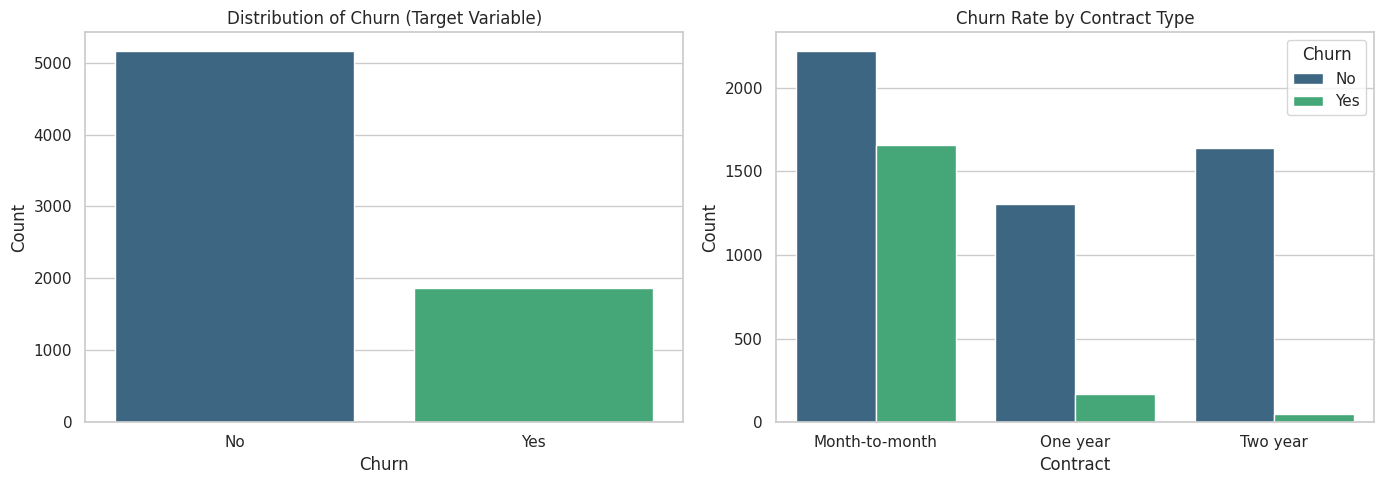

In [26]:
# --- 1. Data Cleaning (資料清理) ---
# Convert 'TotalCharges' to numeric, turning errors (empty strings) into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many missing values we created (should be very few, around 11)
print(f"Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Drop rows with missing values (since it's a tiny fraction of data)
df.dropna(inplace=True)
print("✅ Cleaned missing values in TotalCharges.")

# --- 2. Exploratory Data Analysis (EDA) ---
# Set up a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Churn Distribution (目標變數分佈)
sns.countplot(x='Churn', data=df, palette='viridis', ax=ax[0])
ax[0].set_title('Distribution of Churn (Target Variable)')
ax[0].set_ylabel('Count')

# Plot 2: Churn by Contract Type (合約類型與流失的關係)
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis', ax=ax[1])
ax[1].set_title('Churn Rate by Contract Type')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [27]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Preprocessing (資料前處理) ---

# Drop customerID as it's not useful for prediction
df2 = df.drop('customerID', axis=1)

# Encode the Target variable 'Churn' (Yes=1, No=0)
le = LabelEncoder()
df2['Churn'] = le.fit_transform(df2['Churn'])

# Convert all other categorical variables into numeric (One-Hot Encoding)
# drop_first=True helps reduce redundancy (e.g., we don't need both Male and Female columns)
df_dummies = pd.get_dummies(df2, drop_first=True)

# Split data into Features (X) and Target (y)
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']

# Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Data processed. Training shape: {X_train.shape}, Testing shape: {X_test.shape}")

# --- 2. Model Building & Evaluation (建立模型與評估) ---

# Model A: Logistic Regression (Good baseline)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Logistic Regression with Scaling
log_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=5000))
])

log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Model B: Random Forest (Usually higher accuracy)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- 3. Print Results (顯示結果) ---
print("\n========== Model Results ==========")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Random Forest Accuracy:       {accuracy_score(y_test, y_pred_rf):.4f}")

print("\n--- Classification Report (Random Forest) ---")
print(classification_report(y_test, y_pred_rf))

✅ Data processed. Training shape: (5625, 30), Testing shape: (1407, 30)

========== Model Results ==========
Logistic Regression Accuracy: 0.7875
Random Forest Accuracy:       0.7854

--- Classification Report (Random Forest) ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



/tmp/ipython-input-2158619395.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


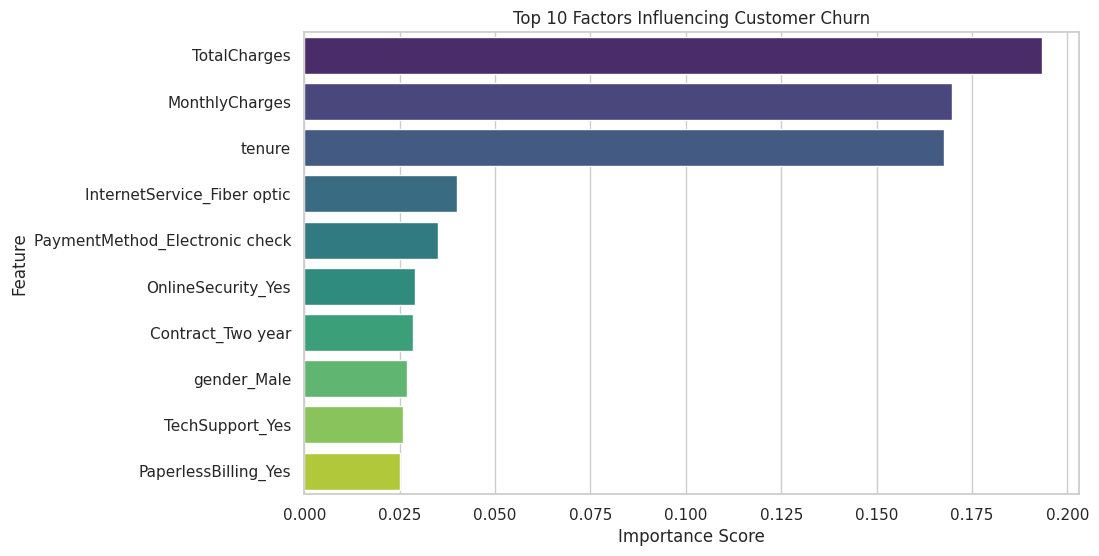

In [28]:
# --- Feature Importance Analysis (特徵重要性分析) ---

# Get feature importance from the Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to organize them
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance (highest on top)
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the Top 10 Features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Top 10 Factors Influencing Customer Churn')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


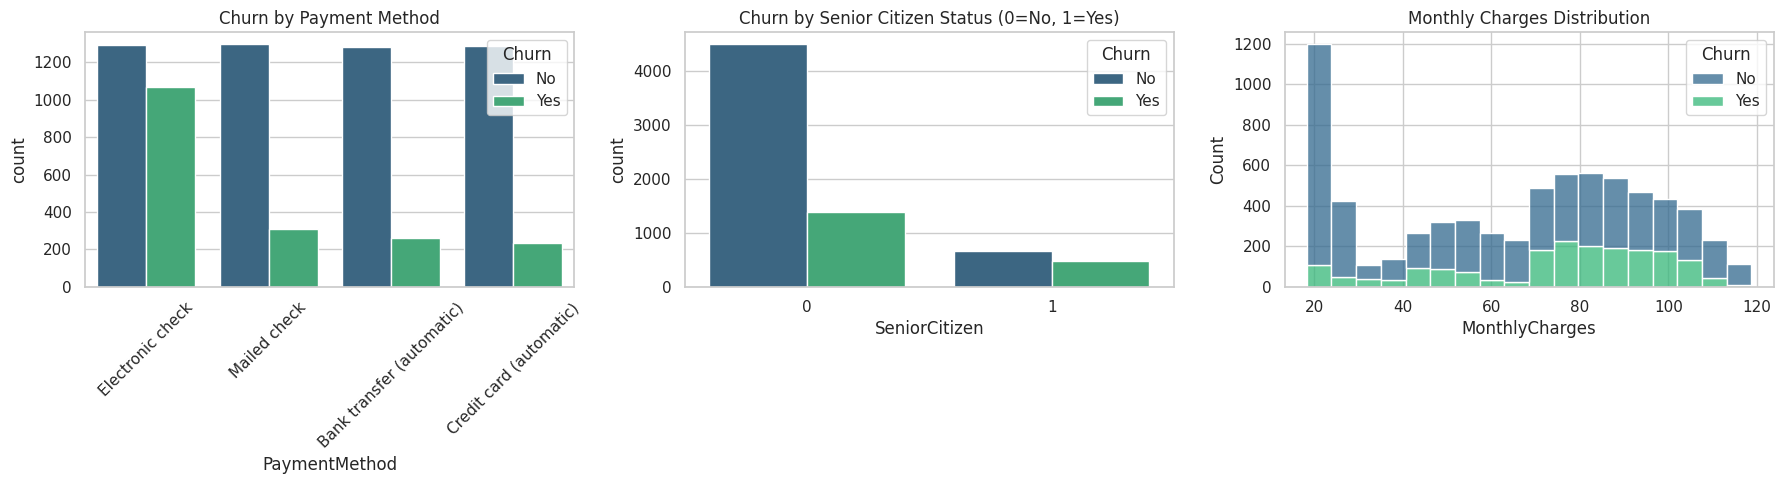

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 圖 4: Payment Method (支付方式)
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Churn by Payment Method')
axes[0].tick_params(axis='x', rotation=45) # 轉一下文字以免重疊

# 圖 5: Senior Citizen (是否為老年人)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Churn by Senior Citizen Status (0=No, 1=Yes)')

# 圖 6: Monthly Charges Distribution (月費分佈)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple="stack", palette='viridis', ax=axes[2])
axes[2].set_title('Monthly Charges Distribution')

plt.tight_layout()
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities (for AUC)
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC-AUC
auc_log = roc_auc_score(y_test, y_prob_log)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print("\n========== ROC-AUC ==========")
print(f"Logistic Regression AUC: {auc_log:.4f}")
print(f"Random Forest AUC:       {auc_rf:.4f}")



========== ROC-AUC ==========
Logistic Regression AUC: 0.8319
Random Forest AUC:       0.8160


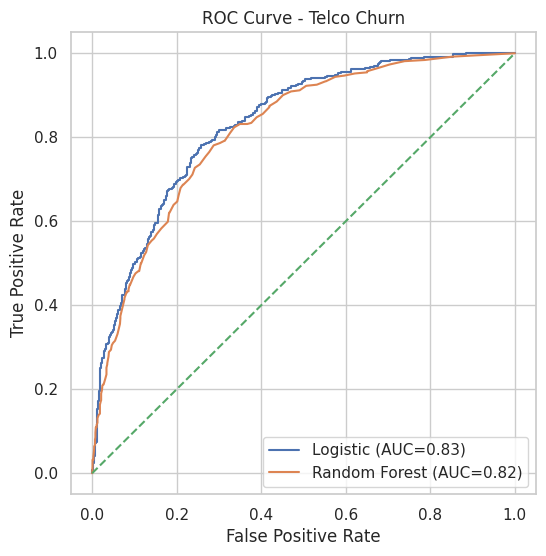

In [31]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC={auc_log:.2f})")
plt.plot(fpr_rf,  tpr_rf,  label=f"Random Forest (AUC={auc_rf:.2f})")
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Telco Churn")
plt.legend()
plt.show()


In [32]:
from sklearn.model_selection import cross_val_score

cv_auc_log = cross_val_score(log_model, X, y, cv=5, scoring="roc_auc").mean()
cv_auc_rf  = cross_val_score(rf_model, X, y, cv=5, scoring="roc_auc").mean()

print("CV AUC (Logistic):", round(cv_auc_log, 4))
print("CV AUC (Random Forest):", round(cv_auc_rf, 4))


CV AUC (Logistic): 0.8452
CV AUC (Random Forest): 0.8232
